In [76]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nkovidreddy/databank/master/bank-additional/bank-additional-full.csv'
bank_read = pd.read_csv(url, sep=';')
bank_read.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#List all columns for the data to view patterns lying in the data
print(bank_read.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [4]:
print(bank_read.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [8]:
# The outcome is stored in column 'y' and 
#checking out the distinct values of outcome which are yes and no as shown below
bank_read['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
#Converting 'No' to 0 and 'Yes' to 1 for statistical computations and value closer to 1 in predictive
# analysis is the customer is likely to subscribe versus 0 who would not be subscribing
#Storing the transformed values in a new column as outcome

In [9]:
bank_read['outcome']=bank_read.y.map({'no':0,'yes':1})

In [11]:
#Check that new column is added
print(bank_read.columns)
bank_read.head()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'outcome'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [25]:
#Lets explore how each column influences the outcome
bank_read['age'].isnull().sum()
bank_read.groupby('age').outcome.mean()


age
17    0.400000
18    0.428571
19    0.476190
20    0.353846
21    0.284314
22    0.262774
23    0.212389
24    0.185745
25    0.155518
26    0.174785
27    0.133960
28    0.150849
29    0.128011
30    0.117853
31    0.112994
32    0.099675
33    0.114566
34    0.105444
35    0.094940
36    0.086517
37    0.092881
38    0.101635
39    0.079609
40    0.072351
41    0.088419
42    0.079685
43    0.083412
44    0.076162
45    0.083409
46    0.076699
        ...   
65    0.522727
66    0.508772
67    0.423077
68    0.454545
69    0.411765
70    0.404255
71    0.396226
72    0.382353
73    0.382353
74    0.468750
75    0.458333
76    0.529412
77    0.650000
78    0.518519
79    0.500000
80    0.580645
81    0.400000
82    0.647059
83    0.470588
84    0.428571
85    0.466667
86    0.625000
87    1.000000
88    0.409091
89    1.000000
91    0.000000
92    0.750000
94    0.000000
95    0.000000
98    1.000000
Name: outcome, dtype: float64

In [26]:
#Here age=98 has outcome mean of 1 which is a compulsory Yes but lets see how many customers are with age 98
(bank_read['age']==98).sum()

2

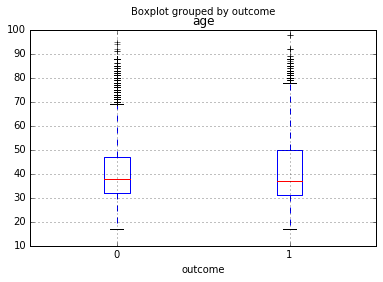

In [29]:
#View the quartile ranges through box and whisker plot and looks like both the medians have a yes and no 
# This may not be a deciding column for analysis
%matplotlib inline
bank_read.boxplot(column='age', by='outcome')

In [30]:
#job vs outcome
bank_read['job'].isnull().sum()
bank_read.groupby('job').outcome.mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: outcome, dtype: float64

In [78]:
#checking the number of unknown job descriptions
#bank_read['job'].unique()
#(bank_read['job']=='admin.').sum()
#330 of 41188 rows has job equal to unknown
#denormalizing the job profiles and previous outcomes into columnar levels and add it to the dataset
job_denorm = pd.get_dummies(bank_read.job, prefix='job')
poutcome_denorm = pd.get_dummies(bank_read.poutcome, prefix='poutcome')
#print(job_denorm)
#print(poutcome_dummies)
#bank_read = pd.concat([bank_read, job_denorm, poutcome_denorm], axis=1)
#bank_read.head()
#bank_read.job.value_counts()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
#Calculating outcome mean by default and checking if null values present
bank_read['default'].isnull().sum()

0

In [66]:
bank_read.groupby('default').outcome.mean()

default
no         0.12879
unknown    0.05153
yes        0.00000
Name: outcome, dtype: float64

In [73]:
bank_read.default.value_counts()
bank_read.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,NaN,no,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,services,married,high.school,NaN,yes,no,telephone,may,mon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,admin.,married,basic.6y,NaN,no,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,services,married,high.school,NaN,no,yes,telephone,may,mon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
#Here credit in default is yes only for 3 out 40000+ records which is a outlier 
#Assuming Unknown credit default values into Yes to make it a two categorical values with YES and NO
#Yes represents - 1 and No - represents 0
bank_read['default'] = bank_read.default.map({'no':0, 'unknown':1, 'yes':1})


Series([], Name: default, dtype: int64)

In [75]:
print(bank_read.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',
       ...
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object', length=217)
